In [1]:
from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.patches import Circle
import pandas as pd
from datetime import datetime
import sys
size_outside = 400 # phe
import copy
start_date_2020 = datetime.strptime("2019-11-25 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

ring_size_upper = 10000
ring_completeness_cut = 0.9
ring_containment_cut = 0.9

sys.path.append("/Users/vdk/Software/code")
from python_modules.muonpipe.usefull_func import hist_wo_outliers


In [2]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[3:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < 1) & (df_all_data['size_outside'] < 500)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/9_600-1200fits_lowNSB.csv']


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97948/3755645515.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[3:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97948/3755645515.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[3:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97948/3755645515.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[3:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_97948/3755645515.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on i

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,1908269.0,1.628814e+09,-1.0,1771.1868,11.922281,-0.736557,0.093304,1.018889,0.091140,1.0,...,8.192236,-7.447991,-3.411768,0.077092,0.193465,0.528455,357.0,0.568137,7.0,0.0
1,1910243.0,1.628814e+09,-1.0,1725.7104,0.000000,0.399947,-0.778830,1.056289,0.086697,1.0,...,9.066333,-7.139511,-5.588003,0.065222,-0.189090,-0.209235,390.0,0.081172,9.0,0.0
2,1912269.0,1.628814e+09,-1.0,2720.0898,0.000000,-0.420793,-0.846652,1.130866,0.100705,1.0,...,4.835986,-0.423881,-4.817373,0.078878,0.098259,-0.601725,434.0,0.721877,12.0,0.0
3,1912668.0,1.628814e+09,-1.0,2484.1800,0.000000,0.144531,0.238866,1.127745,0.092393,1.0,...,5.021616,1.441737,4.810200,0.071139,0.185260,-0.167293,442.0,0.521172,7.0,0.0
4,1913429.0,1.628814e+09,-1.0,2469.2207,0.000000,0.860967,0.681510,1.142242,0.059713,1.0,...,5.565325,-3.530081,4.302484,0.047224,0.217987,0.399644,416.0,0.056718,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901055,5055075.0,1.674713e+09,-1.0,1242.5120,0.000000,-1.224233,2.159202,1.161522,0.080167,True,...,6.374878,-0.132690,6.373497,0.069734,-1.031511,0.640002,182.0,0.277134,10.0,0.0
23901056,5055159.0,1.674713e+09,-1.0,2182.8315,0.000000,0.045469,-0.660867,1.009607,0.071180,True,...,5.291778,5.289639,-0.150436,0.062548,-0.373700,0.266113,353.0,0.320824,10.0,0.0
23901057,5055180.0,1.674713e+09,-1.0,2119.8528,81.346530,0.501732,0.109346,0.891445,0.089546,True,...,5.857258,5.855136,-0.157671,0.092540,-0.898507,0.739353,274.0,0.804299,12.0,0.0
23901058,5056311.0,1.674713e+09,-1.0,1821.9410,6.692784,-0.431301,0.734208,0.981532,0.112360,True,...,9.194141,5.191974,-7.587862,0.091770,-0.250212,-0.288611,327.0,0.404962,12.0,0.0


In [28]:
listdir_perf_paper = glob.glob("/Users/vdk/muons2024/lapalma_simulations/performance_paper/tables/*")

listdir_global_peak = glob.glob("/Users/vdk/muons2024/lapalma_simulations/global_peak/tables/*")

dat = Table.read('{}'.format(listdir_perf_paper[0]), format='fits')

for muon_file in listdir_perf_paper:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat2['is_valid'] = dat2['is_valid'].astype(bool)
    dat2['parameters_at_limit'] = dat2['parameters_at_limit'].astype(bool)
    dat = vstack([dat, dat2])
min_impact = min(df_good_data_real['impact_parameter'])
max_impact = max(df_good_data_real['impact_parameter']) 
df = dat.to_pandas()
df_good_data = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['impact_parameter'] < max_impact) &
                      (df['impact_parameter'] > min_impact)]


dat = Table.read('{}'.format(listdir_global_peak[0]), format='fits')
for muon_file in listdir_global_peak:
    dat2 = Table.read(muon_file, format='fits')
    dat2['good_ring'] = dat2['good_ring'].astype(bool)
    dat = vstack([dat, dat2])
min_impact = min(df_good_data_real['impact_parameter'])
max_impact = max(df_good_data_real['impact_parameter']) 
df = dat.to_pandas()
df_good_data_global = df[(df['muon_efficiency'] < 1) & 
                      (df['size_outside'] < 500) &
                      (df['impact_parameter'] < max_impact) &
                      (df['impact_parameter'] > min_impact)]

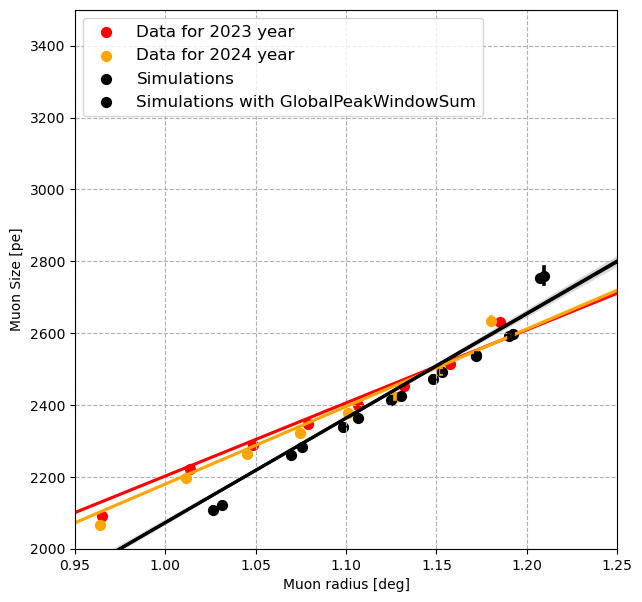

In [29]:
ring_completeness_cut = 0.9
ring_containment_cut = 0.9
bin_number = 8


colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
]

alpha_reg = 1

plt.figure(figsize = (7,7))

flag = '2023-24'


sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > ring_completeness_cut) & 
                                                 (df_good_data_real['ring_containment'] > ring_containment_cut) & 
                                                 (df_good_data_real['size_outside'] < size_outside) &  
                                                 (df_good_data_real['ring_size'] < ring_size_upper) &
                                                (df_good_data_real['event_time'] > start_date_2023) &
                                                (df_good_data_real['event_time'] < end_date_2023)], 
            y = df_good_data_real['ring_size'][(df_good_data_real['ring_completeness'] > ring_completeness_cut) & 
                                               (df_good_data_real['ring_containment'] > ring_containment_cut) & 
                                               (df_good_data_real['size_outside'] < size_outside) & 
                                               (df_good_data_real['ring_size'] < ring_size_upper) & 
                                                (df_good_data_real['event_time'] > start_date_2023) &
                                                (df_good_data_real['event_time'] < end_date_2023)], 
            x_bins=bin_number, color='red', label = 'Data for 2023 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})

sns.regplot(x = df_good_data_real['ring_radius'][(df_good_data_real['ring_completeness'] > ring_completeness_cut) & 
                                                 (df_good_data_real['ring_containment'] > ring_containment_cut) & 
                                                 (df_good_data_real['size_outside'] < size_outside) &  
                                                 (df_good_data_real['ring_size'] < ring_size_upper) &
                                                (df_good_data_real['event_time'] > start_date_2024) &
                                                (df_good_data_real['event_time'] < end_date_2024)], 
            y = df_good_data_real['ring_size'][(df_good_data_real['ring_completeness'] > ring_completeness_cut) & 
                                               (df_good_data_real['ring_containment'] > ring_containment_cut) & 
                                               (df_good_data_real['size_outside'] < size_outside) & 
                                               (df_good_data_real['ring_size'] < ring_size_upper) & 
                                                (df_good_data_real['event_time'] > start_date_2024) &
                                                (df_good_data_real['event_time'] < end_date_2024)], 
            x_bins=bin_number, color='orange', label = 'Data for 2024 year',scatter_kws={'alpha':alpha_reg}, line_kws={'alpha': alpha_reg})


sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) &
                                            (df_good_data['ring_containment'] > ring_containment_cut) &  
                                            (df_good_data['size_outside'] < size_outside) & 
                                            (df_good_data['ring_size'] < ring_size_upper) & 
                                            (df_good_data['muon_efficiency'] < 1)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & 
                                          (df_good_data['ring_containment'] > ring_containment_cut) & 
                                          (df_good_data['size_outside'] < size_outside) & 
                                          (df_good_data['ring_size'] < ring_size_upper) & 
                                          (df_good_data['muon_efficiency'] < 1)], 
            x_bins=bin_number, color='k', label = 'Simulations')

sns.regplot(x = df_good_data_global['ring_radius'][(df_good_data_global['ring_completeness'] > 0.9) &
                                            (df_good_data_global['ring_containment'] > ring_containment_cut) &  
                                            (df_good_data_global['size_outside'] < size_outside) & 
                                            (df_good_data_global['ring_size'] < ring_size_upper) & 
                                            (df_good_data_global['muon_efficiency'] < 1)], 
            y = df_good_data_global['ring_size'][(df_good_data_global['ring_completeness'] > 0.9) & 
                                          (df_good_data_global['ring_containment'] > ring_containment_cut) & 
                                          (df_good_data_global['size_outside'] < size_outside) & 
                                          (df_good_data_global['ring_size'] < ring_size_upper) & 
                                          (df_good_data_global['muon_efficiency'] < 1)], 
            x_bins=bin_number, color='k', label = 'Simulations with GlobalPeakWindowSum')




plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon Size [pe]')
plt.grid(linestyle="dashed")
plt.ylim(2000,3500)
plt.xlim(0.95,1.25)

plt.legend(prop={'size': 12}, loc=2)
#plt.show()
#plt.savefig(f'/Users/vdk/size_{flag}_nsb15.png', dpi=200)
#plt.savefig(f'/Users/vdk/width_{flag}_n.png', dpi=200)

In [12]:
df_good_data_real.shape

(23891970, 23)

In [19]:
df_good_data_global['ring_size'][(df_good_data_global['ring_completeness'] > 0.9) & 
                                          (df_good_data_global['ring_containment'] > ring_containment_cut) & 
                                          (df_good_data_global['size_outside'] < size_outside) & 
                                          (df_good_data_global['ring_size'] < ring_size_upper) & 
                                          (df_good_data_global['muon_efficiency'] < 1)]

NameError: name 'df_good_data_global' is not defined